\title{Assignment 1 \\ Advanced Signal Processing}
\author{Thomas Seeberg Christiansen}
\date{\today}

\maketitle

In [4]:
##### Imports #####
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.signal as sig
import import_ipynb
import FunctionLibrary as FL

importing Jupyter notebook from FunctionLibrary.ipynb


# Problem 1

## 1)

The system function is defined as:
$$H(z)=1+2.5z^{-1}+z^{-2}$$
which we need to factorize into the two components of a minimum phase filter $H_{min}(z)$ and an all-pass filter $H_{ap}(z)$. The first step is determining the Zeros of $H(z)$. 
$$H(z)=(z^{-1}+2)(z^{-1}+0.5)$$
$$z_1=-1/2 \quad\textrm{and}\quad z_2=-2$$
Here we have $z_1$ being inside the unit circle and $z_2$ being outside and $z_2$ would need to be reflected back inside the unit circle with its reciprocal $1/z_2=-0.5$. The decomposition can be constructed with
$$H(z)=\underbrace{H_1(z)(1-az^{-1})\vphantom{\frac{(z^{-1}-a^\ast)}{(1-az^{-1})}}}_\text{minimum phase} \underbrace{\frac{(z^{-1}-a^\ast)}{(1-az^{-1})}}_\text{All-pass}$$
A minimum phase system is defined as having its poles and zeros inside the unit circle and since $z_1$ being inside, we have the factor
$$H_min(z)=H_1(z)(1+2z^{-1})=(1+0.5z^{-1})(1+2z^{-1})=\frac{1}{2}z^{-2}+2z^{-1}+2$$
as the minimum phase.
The all-pass can be constructed, using the given form, as 
$$H_{ap}(z)=\frac{(z^{-1}-a^\ast)}{(1-az^{-1})}=\frac{z^{-1}-(-2)}{1-(-0.5)z^{-1}}=\frac{z^{-1}+2}{1+0.5z^{-1}}$$
Combining everything, we get the decomposition as:
$$H(z)=H_{min}(z)H_{ap}(z)=\bigg(\frac{1}{2}z^{-2}+2z^{-1}+2\bigg)\bigg(\frac{z^{-1}+2}{1+0.5z^{-1}}\bigg)$$

## 2)

Filtering with the system function $H(z)$ filter yields a constant group delay due to the filter being a linear phase filter. This means all frequency components of the signal are eqaully delayed without introducing phase distortion. However, filtetering with a minimum phase filter $H_{min}(z)$ does not have a constant group delay because it tries to minimize the group delay at the frequency components, meaning different frequencies experience different delays in turn create phase distortion. In summary, filtetering $H_{min}(z)$ has the least phase delay, but possible distortion, while filtering with $H(z)$ has uniform delay without distortion. Choosing which to use is application dependent if one would want to preserve the phase or minimize the delay. 

# Problem 2

## 1) Compute the autocorrelation

Inserting $y[n]$ into $r_y[l]$
$$\begin{aligned}
r_y[l]&=E\Bigg(\bigg(x[n]-\frac{1}{5}[n-1]\bigg)\cdot\bigg(x[n-l]-\frac{1}{5}x[n-l-1]\bigg)\Bigg) \\
&=E\bigg(x[n]x[n-l]-\frac{1}{5}x[n]x[n-l-1]-\frac{1}{5}x[n-1]x[n-l]+\frac{1}{25}x[n-1]x[n-l-1]\bigg)
\end{aligned}$$
The expected operator is linear meaning the expected value of a sum of variables is equivalent to the sum of the expected value of the individual variables, also scaling linearly with constants. So,
$$r_y[l]=E\big(x[n]x[n-l]\big)-\frac{1}{5}E\big(x[n]x[n-l-1]\big)-\frac{1}{5}E\big(x[n-1]x[n-l]\big)+\frac{1}{25}E\big(x[n-1]x[n-l-1]\big)$$

Looking at $l=0$, we get:
$$r_y[0]=E\big(x[n]^2\big)-\frac{1}{5}E\big(x[n]x[n-1]\big)-\frac{1}{5}E\big(x[n-1]x[n]\big)+\frac{1}{25}E\big(x[n-1]^2\big)$$
and since $x[n]$ is zero-mean, unit-variance white noise, we have:
$$E(x[n]^2)=1\quad \textrm{and}\quad E(x[n]x[n-1])=0.$$
Thus,
$$r_y[0]=1-1/5\cdot0-1/5\cdot0+1/25\cdot1=1+1/25=26/25$$
Using the same procedure for $l=\pm1$ and $l=\pm2$, yields
$$r_y[\pm1]=0-1/5\cdot0-1/5\cdot1+0=-1/5$$
$$r_y[\pm2]=0$$
Finaly, the autocorrelation function can be described with the delta function:
$$r_y[l]=-\frac{1}{5}\delta[l+1]+\frac{26}{25}\delta[l]-\frac{1}{5}\delta[l-1]$$


## 2) Correlation discussion

To determine whether the two samples are correlated or not, we look at the autocorrelation evaluated at $l=2$. Which as we saw from above is equal to 0.
$$r_y[2]=-\frac{1}{5}\delta[3]+\frac{26}{25}\delta[2]-\frac{1}{5}\delta[1]=0$$
Hence, they are uncorrelated. The autocorrelation would need to be nonzero for them to be correlated. 

## 3) Mean value determination

The mean value of $y[n]$ is equivalent to the expected value.
$$\mu_y=E(y[n])=E\bigg(x[n]-\frac{1}{5}x[n-1]\bigg)$$
Having the same terms as the calculations in 1) and knowning $x[n]$ is a Gaussian random process with zero-mean, the expected values terms are:
$$\mu_y = 0-\frac{1}{5}\cdot0=0$$

## 4) Compute and sketch the PSD

We get the power spectral density (PSD) by taking the Fourier transform of the autocorrelation sequence. 
$$S_y(e^{j\omega})=\sum_{k=-\infty}^\infty r_y[l]e^{j\omega k}$$
The autocorrelation, as seen earlier, is zero for all other lags than $l=-1,0,1$, hence we get:
$$
\begin{aligned}
S_y(e^{j\omega})&=\sum_{k=-1}^1 r_y[l]e^{j\omega k} \\
&=r_y[-1]e^{j\omega}+r_y[0]+r_y[1]e^{-j\omega} \\
&=-\frac{1}{5}e^{j\omega}+\frac{26}{25}-\frac{1}{5}e^{-j\omega} \\
&=\frac{26}{25}-\frac{1}{5}(e^{j\omega}+e^{-j\omega})
\end{aligned}
$$
Using Eulers relation, we get
$$\frac{1}{5}(e^{j\omega}+e^{-j\omega})= \frac{2}{5}\frac{(e^{j\omega}+e^{-j\omega})}{2}=\frac{2}{5}\cos(\omega)$$
Therefore,
$$S_y(e^{j\omega})=\frac{26}{25}-\frac{2}{5}\cos(\omega)$$
Plotting gets us the following.


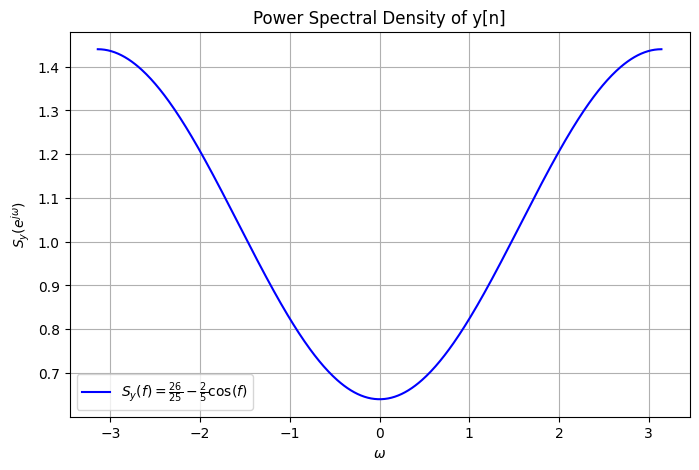

In [16]:
# Range
omega = np.linspace(-np.pi, np.pi, 500)
# Function
S_y = (26 / 25) - (2 / 5) * np.cos(omega)

# Plot the PSD
plt.figure(figsize=(8, 5))
plt.plot(omega, S_y, label=r'$S_y(f) = \frac{26}{25} - \frac{2}{5} \cos(f)$', color='blue')
plt.title('Power Spectral Density of y[n]')
plt.xlabel('$\omega$')
plt.ylabel('$S_y(e^{j\omega})$')
plt.grid(True)
plt.legend()
plt.show()

# Problem 3

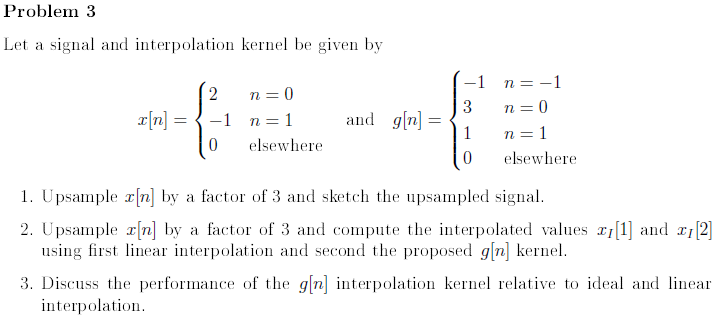

# Problem 4

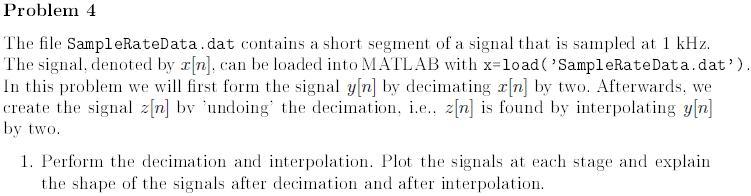

# Problem 5

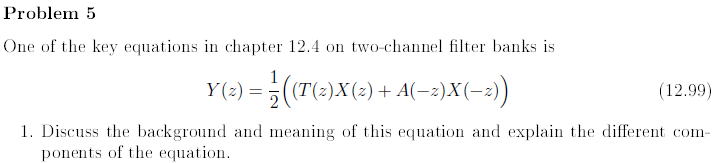

# Problem 6

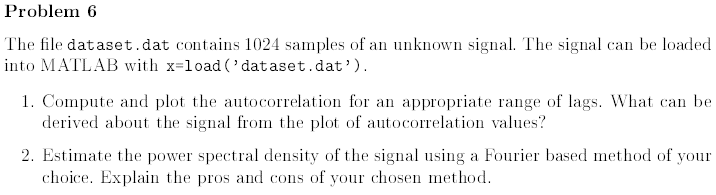